In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<!-- Collecting Data -->

In [2]:
# Import data salary
dataset = pd.read_csv('salary.csv', sep='|')

In [3]:
# Head buat nampilin data teratas
dataset.head(5)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


<!-- Cleaning Data -->

In [4]:
# Transform Dataframe Disini / Manipulasi Data

# Remove Salary = null
dataset.dropna(subset=["salary"], inplace=True)
dataset["salary"] = dataset["salary"].astype('int')

# Change Salary = null => 0
# dataset["salary"] = dataset["salary"].fillna(0).astype('int')

# Add column year experience based on column experience_level
dataset["years_experience"] = dataset["experience_level"]
dataset["years_experience"] = dataset["years_experience"].str.replace("\D", "").fillna(0).astype('int')

In [5]:
# Nampilin detail dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9352 entries, 5 to 34745
Data columns (total 16 columns):
id                      9352 non-null int64
job_title               9352 non-null object
location                9352 non-null object
salary_currency         9352 non-null object
career_level            9352 non-null object
experience_level        8570 non-null object
education_level         9352 non-null object
employment_type         9352 non-null object
job_function            9352 non-null object
job_benefits            7070 non-null object
company_process_time    6157 non-null object
company_size            7928 non-null object
company_industry        9060 non-null object
job_description         9352 non-null object
salary                  9352 non-null int32
years_experience        9352 non-null int32
dtypes: int32(2), int64(1), object(13)
memory usage: 1.1+ MB


In [6]:
# Nampilin tipe kolom "Object"
objectType = dataset.select_dtypes('object').columns
objectType

Index(['job_title', 'location', 'salary_currency', 'career_level',
       'experience_level', 'education_level', 'employment_type',
       'job_function', 'job_benefits', 'company_process_time', 'company_size',
       'company_industry', 'job_description'],
      dtype='object')

In [7]:
# Nampilin tipe kolom "Numeric"
numericType = dataset.select_dtypes('number').columns
numericType

Index(['id', 'salary', 'years_experience'], dtype='object')

In [8]:
# Check data yang Null / NaN
dataset.isnull().sum()

id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
experience_level         782
education_level            0
employment_type            0
job_function               0
job_benefits            2282
company_process_time    3195
company_size            1424
company_industry         292
job_description            0
salary                     0
years_experience           0
dtype: int64

In [9]:
# Re-check Isnull
dataset.isnull().sum()

id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
experience_level         782
education_level            0
employment_type            0
job_function               0
job_benefits            2282
company_process_time    3195
company_size            1424
company_industry         292
job_description            0
salary                     0
years_experience           0
dtype: int64

In [10]:
generalNumeric = dataset[numericType].describe()
generalNumeric

,id,salary,years_experience
count,9352.000000,9.352000e+03,9352.000000
mean,21445.615483,7.358879e+06,2.184132
std,11107.218801,2.148128e+07,1.796006
min,6.000000,1.000000e+01,0.000000
25%,11865.750000,4.250000e+06,1.000000
50%,23332.500000,5.500000e+06,2.000000
75%,32408.250000,8.000000e+06,3.000000
max,34746.000000,2.000000e+09,20.000000


In [11]:
# Re-check table 
dataset.head(5)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,years_experience
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,NaN,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000,0
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000,3
18,19,Accounting Staff,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000,1
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000,2
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2 tahun,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000,2


<!-- Analizing Data -->

In [12]:
CL = dataset["career_level"]

In [13]:
dataset['count_career'] = dataset.id.where(dataset.career_level.isin(CL)).groupby(dataset['career_level']).transform('count')

In [14]:
# dataset.drop_duplicates(subset="career_level", inplace=True)
tableCareer = dataset[["career_level","count_career"]]
tableCareer.drop_duplicates(inplace=True)

c:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
tableCareer.set_index("career_level").sort_values(by="count_career", ascending=False)

,count_career
career_level,
Pegawai (non-manajemen & non-supervisor),5695
Supervisor/Koordinator,1568
Manajer/Asisten Manajer,1217
Lulusan baru/Pengalaman kerja kurang dari 1 tahun,703
CEO/GM/Direktur/Manajer Senior,169


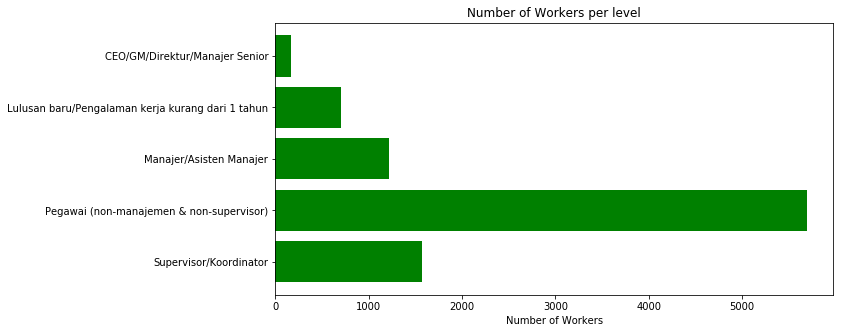

In [15]:
xCareer = list(tableCareer.loc[:, "career_level"])
yCareer = list(tableCareer.loc[:, "count_career"])

plt.figure(figsize=(10, 5))
plt.barh(xCareer, yCareer, color='green')
plt.title("Number of Workers per level")
plt.xlabel("Number of Workers")
plt.show()

In [16]:
dataset.groupby(by="career_level")["salary"].mean().round(0).astype("int").nlargest()

career_level
CEO/GM/Direktur/Manajer Senior                       25860062
Manajer/Asisten Manajer                              12982517
Supervisor/Koordinator                                7728660
Pegawai (non-manajemen & non-supervisor)              5880857
Lulusan baru/Pengalaman kerja kurang dari 1 tahun     4324536
Name: salary, dtype: int32